<a href="https://colab.research.google.com/github/regmul/-Unsupervised_earning_Clustering_Checkpoint/blob/main/Unsupervised_Learning_Clustering_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What You're Aiming For**
In this checkpoint, we are going to work on the 'Credit Card Dataset for Clustering' dataset provided by Kaggle.

Dataset description : This dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during 6 months period. This case requires to develop a customer segmentation to define marketing strategy.

➡️ Dataset link

https://i.imgur.com/gAT5gVg.jpg

Columns explanation :

CUST_ID: Identification of Credit Card holder (Categorical)
BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES: Amount of purchases made from account
CASH_ADVANCE: Cash in advance given by the user
CREDIT_LIMIT: Limit of Credit Card for user
PAYMENTS: Amount of Payment done by user

Instructions
Import you data and perform basic data exploration phase
Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )
Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')
Perform partitional clustering using the K-means algorithm. Then, plot the clusters
Find the best k value and plot the clusters again.
Interpret the results

**1. Import you data and perform basic data exploration phase**

Import the necessary libralies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [4]:
uploaded = files.upload()

Saving Credit_card_dataset.csv to Credit_card_dataset.csv


In [5]:
df = pd.read_csv('Credit_card_dataset.csv')

In [6]:
# checking the first few raws
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


**2. Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )**

In [7]:
# checking for missing values
df.isnull().sum()

,0
CUST_ID,0
BALANCE_FREQUENCY,0
PURCHASES,0
PAYMENTS,0
CREDIT_LIMIT,1
CASH_ADVANCE,0


No missing values

In [8]:
# Separate numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Separate categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT', 'CASH_ADVANCE']
Categorical Columns: ['CUST_ID']


Since Customer ID is an identifier, we will drop it from the dataframe

In [9]:
# drop CUST_ID (identifier)
df = df.drop('CUST_ID', axis=1)

In [10]:
df.head()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0.818182,95.40,201.802084,1000.0,0.000000
1,0.909091,0.00,4103.032597,7000.0,6442.945483
2,1.000000,773.17,622.066742,7500.0,0.000000
3,0.636364,1499.00,0.000000,7500.0,205.788017
4,1.000000,16.00,678.334763,1200.0,0.000000


Handling Outliers

In [11]:
# Handling outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Original shape:", df.shape)
print("After removing outliers:", df_no_outliers.shape)


Original shape: (8950, 5)
After removing outliers: (5620, 5)


In [12]:
df_no_outliers.head()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0.818182,95.40,201.802084,1000.0,0.0
2,1.000000,773.17,622.066742,7500.0,0.0
4,1.000000,16.00,678.334763,1200.0,0.0
5,1.000000,1333.28,1400.057770,1800.0,0.0
7,1.000000,436.20,679.065082,2300.0,0.0


In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [14]:
# selecting features fro X
X = df_no_outliers[['PURCHASES', 'CREDIT_LIMIT']]



In [15]:
# Scale the data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
print(X_scaled)

[[-0.75518259 -0.94475253]
 [ 0.25532274  1.48865444]
 [-0.87356216 -0.86987847]
 ...
 [-0.450139   -0.94475253]
 [-0.68212718 -0.94475253]
 [-0.89741699 -1.13193768]]


In [18]:
# Perform hierarchical clustering (Ward linkage)
Z = linkage(X_scaled, method='ward')

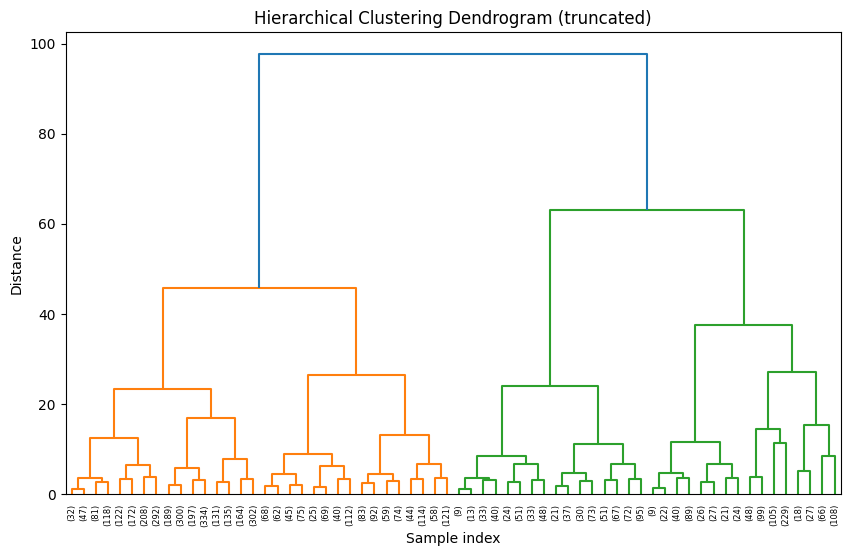

In [19]:
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

In [20]:
clusters = fcluster(Z, 3, criterion="maxclust")

In [22]:
df_no_outliers.loc[:, 'Cluster'] = clusters


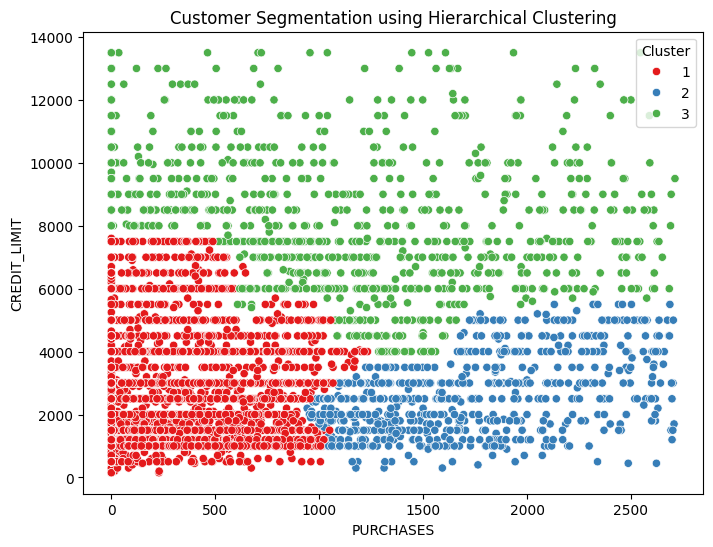

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_no_outliers,
    x='PURCHASES',
    y='CREDIT_LIMIT',
    hue='Cluster',
    palette='Set1'
)
plt.title("Customer Segmentation using Hierarchical Clustering")
plt.show()

## **Cluster Analysis**
**Cluster 1 (Red)**

Low Purchases + Low-to-Mid Credit Limit

Customers in this group don’t spend much and have relatively limited credit limits.

Likely low-value or inactive customers.

Marketing Insight: They might need incentives like discounts or cashback offers to encourage spending.

**Cluster 2 (Blue)**

High Purchases + Low-to-Mid Credit Limit

These customers spend a lot, but their credit limits are constrained.

They are engaged customers who may be limited by available credit.

Marketing Insight: Good candidates for credit limit increase offers or premium card upgrades to maximize profitability.

**Cluster 3 (Green)**

Low-to-High Purchases + High Credit Limit

Customers with very high credit limits, spread across different spending levels.

Some are high spenders, while others are under-utilizing their available credit.

**Marketing Insight:**

For high spenders → VIP/loyalty rewards programs.

For low spenders → Encourage them to use their credit line (e.g., exclusive offers, installment payment options).

**Message to the Board**

The segmentation reveals 3 distinct customer types:

Low-value customers (Red) → Need engagement strategies.

High-potential constrained customers (Blue) → Increase limits, upsell.

Premium/High-credit customers (Green) → Retain with loyalty benefits.

